___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [ ]:
# Visual Python
#!pip install visualpython --upgrade

In [ ]:
# Visual Python
#!visualpy install

# Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






## Import Modules, Load Data and Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate

np.set_printoptions(suppress=True)
plt.rcParams["figure.figsize"] = (7, 4)
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 1000)
pd.options.display.float_format = "{:.3f}".format

In [ ]:
#!pip install -U scikit-learn

In [ ]:
import numpy as np

np.__version__  # np version : 1.23.5

In [ ]:
import sklearn

sklearn.__version__

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [3]:

df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000
mean,18024.381,32089.996,5.937,1.390,1.043,88.499,0.247,1428.662,1337.701,4.832
std,7381.679,36977.215,0.705,1.121,0.339,26.674,0.431,275.804,199.682,0.868
min,4950.000,0.000,5.000,0.000,0.000,40.000,0.000,890.000,840.000,3.000
25%,12850.000,1920.500,5.000,0.000,1.000,66.000,0.000,1229.000,1165.000,4.100
50%,16900.000,20413.000,6.000,1.000,1.000,85.000,0.000,1461.000,1295.000,4.800
75%,21900.000,46900.000,6.000,2.000,1.000,103.000,0.000,1598.000,1472.000,5.400
max,74600.000,317000.000,8.000,3.000,4.000,294.000,1.000,2967.000,2471.000,9.100


In [6]:
df.duplicated().sum()

1673

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.make_model.value_counts()

# In order for ML models to learn a data well, the data should contain all the details as possible.
# When we look at the number of brand models, we see that the number of models of some brands is very low.
# In order for ML models to accurately predict car prices on a brand-by-model basis,
# there must be enough observations from each brand and model. For this, we exclude brand models under 100 from our data.

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

In [10]:
drop_model = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
drop_model

# We list the models with 100 or less observations.
# We will drop the observations of the models in this list from our data.

Index(['Renault Duster', 'Audi A2'], dtype='object', name='make_model')

In [11]:
for i in drop_model:
    drop_index = df[df["make_model"] == i].index
    df.drop(index=drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

# We pull all the models in the model list in order and find the indexes of the observations of these models first.
# We drop the indexes we find from our data every time.
# Since the deleted indexes in the last stage will not appear in our data, we reset the indexes starting from 0.

In [12]:
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14216,Renault Espace,Van,39980,VAT deductible,100.000,Pre-registered,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Central door lock,...",0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front,4.700
14217,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
14218,Renault Espace,Van,39950,VAT deductible,1000.000,Demonstration,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Sport suspens...","ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front,6.800
14219,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400


In [13]:
df.make_model.value_counts()

# We saw that models with less than 100 observations were dropped.

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14221 entries, 0 to 14220
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14221 non-null  object 
 1   body_type            14221 non-null  object 
 2   price                14221 non-null  int64  
 3   vat                  14221 non-null  object 
 4   km                   14221 non-null  float64
 5   Type                 14221 non-null  object 
 6   Fuel                 14221 non-null  object 
 7   Gears                14221 non-null  float64
 8   Comfort_Convenience  14221 non-null  object 
 9   Entertainment_Media  14221 non-null  object 
 10  Extras               14221 non-null  object 
 11  Safety_Security      14221 non-null  object 
 12  age                  14221 non-null  float64
 13  Previous_Owners      14221 non-null  float64
 14  hp_kW                14221 non-null  float64
 15  Inspection_new       14221 non-null 

## Feature Engineering

In [15]:
df.head(2)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600


In [16]:
df_object = df.select_dtypes(include="object").head()
df_object

# select_dtypes(include ="object") to filter only object type features

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


In [17]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

# we see how many unique observations each feature consists of.

# With <30, a 30-character space is left from the leftmost to the ":" sign and feature names are printed in this space.
# The ":" sign is aligned on all lines.

make_model                    : 7
body_type                     : 8
vat                           : 2
Type                          : 5
Fuel                          : 4
Comfort_Convenience           : 6195
Entertainment_Media           : 346
Extras                        : 659
Safety_Security               : 4441
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3


In [18]:
#!pip install matplotlib==3.4

In [19]:
df2 = df.copy()

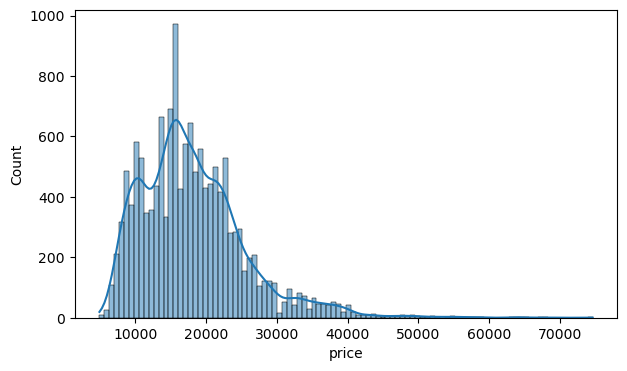

In [20]:
sns.histplot(df.price, bins=100, kde=True);

# Since linear models are very sensitive to outliers, I am trying to detect outliers in the data with histplot.
# Let's not forget that outlier for ML means that the data of a group or groups in our data is insufficient for training.
# By looking at the image below, we see that the number of vehicles over 70.000 EURO is very low.
# Based on this image, we can evaluate that the number of vehicles over 70 thousand EURO may be insufficient for training.
# However, we cannot understand whether it is inadequate or not without training.
# We should decide by both dropping the observations that we consider as outliers and
# comparing the scores by doing the training without dropping them.

# Also, looking at the histplot for all the data may mislead us about the outlier.
# For outlier detection, we should group the data in our data (Opel Astra, Ford Fiesta, Volvo S60 etc.)
# and determine the outlier accordingly.

In [21]:
skew(df.price)

1.2668278550941403

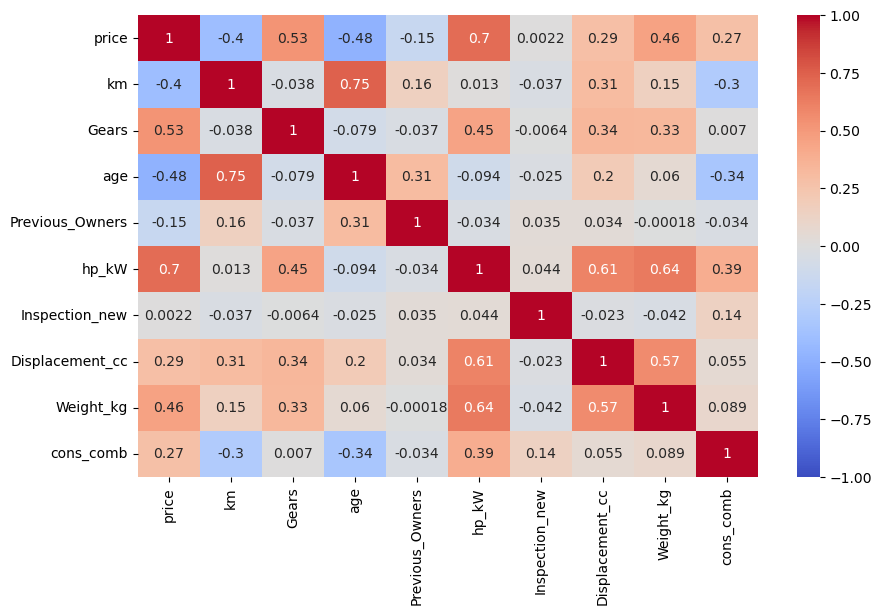

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="coolwarm");

## multicollinearity control

In [23]:
df.corr(numeric_only=True)[
    (abs(df.corr(numeric_only=True)) >= 0.9) & (abs(df.corr(numeric_only=True)) < 1)
].any().any()

# Corr between +/-0.9 and +/-1. We can check multicollinearity for values with this snippet.

False

## Outliers in Price Column

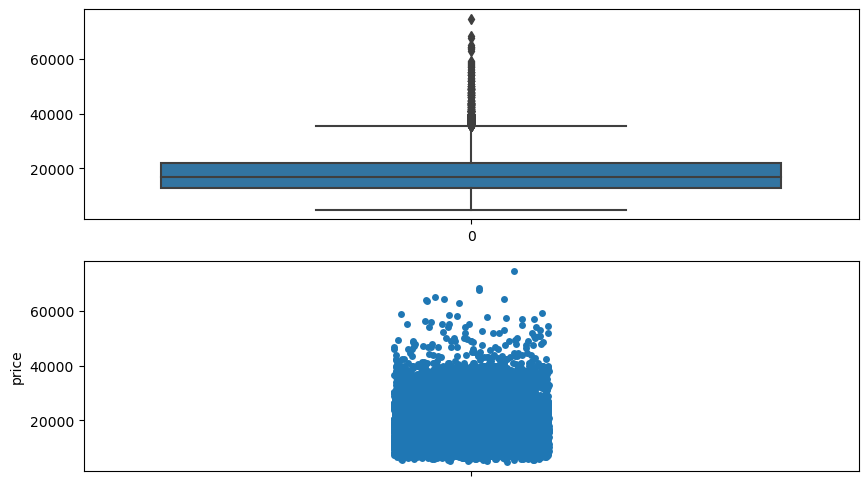

In [24]:
plt.figure(figsize=(10, 6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price);

# We can get insights about outliers via boxplot. However, these insights can mislead us.
# In order to make more accurate comments, we can use the stripplot showing the distribution
# of categorical data. Although boxplot treats cars priced at 50 thousand EURO and above as outliers,
# stripplot tells us that the number of cars priced at 50 thousand EURO and around is not very few.
# But as we said above, our evaluation is not for the data in general. We will do it according to
# the groups in the data (Opel Astra, Ford Fiesta, Volvo S60 etc.).

In [25]:
df.make_model.unique()

# unique groups in our data

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Espace'], dtype=object)

In [26]:
total_outliers = []

for model in df.make_model.unique():
    car_prices = df[df["make_model"] == model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    count_of_outliers = (
        car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]
    ).count()

    total_outliers.append(count_of_outliers)

    print(
        f" The count of outlier for {model:<24} : {count_of_outliers:<2},\
    The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}"
    )
print()
print(
    "Total_outliers : ",
    sum(total_outliers),
    "The rate of total outliers :",
    (sum(total_outliers) / len(df)).round(3),
)

# According to the 1.5 wisker value, we identify the data that we consider to be outliers belonging to each group.

 The count of outlier for Audi A1                  : 5 ,    The rate of outliers : 0.002
 The count of outlier for Audi A3                  : 56,    The rate of outliers : 0.02
 The count of outlier for Opel Astra               : 127,    The rate of outliers : 0.055
 The count of outlier for Opel Corsa               : 0 ,    The rate of outliers : 0.0
 The count of outlier for Opel Insignia            : 109,    The rate of outliers : 0.045
 The count of outlier for Renault Clio             : 37,    The rate of outliers : 0.025
 The count of outlier for Renault Espace           : 20,    The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 0.025


In [27]:

# List of columns to drop
columns_to_drop = ["Type", "Extras", "Fuel", "Comfort_Convenience", "Entertainment_Media", "Safety_Security", "Paint_Type", "Drive_chain"]

# Dropping the specified columns
df.drop(columns=columns_to_drop, inplace=True)


In [28]:
df.head()

,make_model,body_type,price,vat,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,7.000,3.000,2.000,66.000,1,Cloth,Automatic,1422.000,1220.000,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,7.000,2.000,1.000,141.000,0,Cloth,Automatic,1798.000,1255.000,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,7.000,3.000,1.000,85.000,0,Cloth,Automatic,1598.000,1135.000,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,6.000,3.000,1.000,66.000,0,Cloth,Automatic,1422.000,1195.000,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,7.000,3.000,1.000,66.000,1,Cloth,Automatic,1422.000,1135.000,4.100


###  Data Pre-Processing

#### Train | Test Split

In [29]:
X = df.drop(columns="price")
y = df["price"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Converting Object Features into Numerical Features Using Make Column Transformer

In [31]:
df.select_dtypes(include="object").head(5)

,make_model,body_type,vat,Upholstery_type,Gearing_Type
0,Audi A1,Sedans,VAT deductible,Cloth,Automatic
1,Audi A1,Sedans,Price negotiable,Cloth,Automatic
2,Audi A1,Sedans,VAT deductible,Cloth,Automatic
3,Audi A1,Sedans,VAT deductible,Cloth,Automatic
4,Audi A1,Sedans,VAT deductible,Cloth,Automatic


In [32]:
object_columns = df.select_dtypes(include=["object"])

# Displaying the list of object columns
object_column_list = object_columns.columns.tolist()
print("List of object columns:", object_column_list)


List of object columns: ['make_model', 'body_type', 'vat', 'Upholstery_type', 'Gearing_Type']


In [33]:
cat_onehot = [
    'make_model',
    'body_type', 
    'vat', 
    'Upholstery_type',
    'Gearing_Type',
]


In [34]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")


# make_column_transformer function automates transformations to features. It transforms the features
# in order according to the order we will give into this function.

# What does the (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) code do?
# With the handle_unknown = "ignore" parameter, onehotencoder converts all the features in
# the cat_onehot list so that all categorical data passed in the test set and
# not in the train set will be converted to 0.

# What does the (OrdinalEncoder(categories=categories), cat_ordinal) code do?
# After the onehotencoder conversion to the relevant features, all features in the cat_ordinal list
# perform ordinal encoder conversion according to the hierarchical order of the unique categorical
# observations in the categories list.

# IMPORTANT NOTE: The order of the categories parameter of the OrdinalEncoder(categories=) function must be
# the same as the order of the features in the cat_ordinal list, or you will get an error.

# With remainder='passthrough' it means to leave all other features that are not converted.
# if the remainder is "dropped" with the default value, all non-converted features will be dropped from df.
# remainder= If we do MinMaxScaler() or StandardScale(), other features will be scaled except for
# the non-transformed features.

# verbose_feature_names_out=True make_column_transform function, so that it is clear which conversion function
# does which feature, "onehotencoder<__>" prefix at the beginning of onehotencoder conversions,
# ordinalencoder conversions. It is prefixed with "ordinalencoder<__>", and those with remainder operations
# are prefixed with "remainder__". If you want to remove these prefixes, we need to set verbose_feature<_>names_out=False.

In [35]:
X_train.head()

,make_model,body_type,vat,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,cons_comb
14210,Renault Espace,Compact,VAT deductible,500.000,6.000,0.000,1.000,165.000,0,Cloth,Automatic,1798.000,1760.000,6.800
10027,Opel Insignia,Station wagon,VAT deductible,68116.000,6.000,3.000,1.000,100.000,1,Cloth,Manual,1598.000,1487.000,3.900
318,Audi A1,Compact,VAT deductible,56967.000,7.000,3.000,2.000,70.000,1,Cloth,Automatic,999.000,1180.000,4.400
4098,Audi A3,Sedans,VAT deductible,21000.000,6.000,1.000,1.000,85.000,0,Part/Full Leather,Manual,1598.000,1335.000,4.000
3344,Audi A3,Sedans,VAT deductible,26613.000,7.000,2.000,1.000,110.000,0,Cloth,Automatic,1395.000,1300.000,4.600


In [36]:
X_test.head()

,make_model,body_type,vat,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,cons_comb
7261,Opel Astra,Station wagon,VAT deductible,1647.363,6.000,0.000,1.000,67.000,0,Cloth,Manual,1000.000,1425.000,4.500
8215,Opel Corsa,Sedans,VAT deductible,31398.000,5.000,2.000,1.000,55.000,0,Cloth,Manual,1248.000,1162.000,3.800
13945,Renault Espace,Van,VAT deductible,29500.000,6.000,2.000,1.000,118.000,0,Part/Full Leather,Automatic,1598.000,1734.000,4.700
6684,Opel Astra,Sedans,VAT deductible,16950.000,6.000,1.000,1.000,92.000,0,Cloth,Manual,1399.000,1278.000,5.400
13394,Renault Espace,Van,Price negotiable,41000.000,6.000,2.000,1.000,118.000,0,Part/Full Leather,Automatic,1598.000,1734.000,4.600


In [37]:
X_train.shape, X_test.shape

((11376, 14), (2845, 14))

In [38]:
column_trans.fit_transform(X_train).head()

C:\Users\nurel\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
14210,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,500.000,6.000,0.000,1.000,165.000,0,1798.000,1760.000,6.800
10027,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,68116.000,6.000,3.000,1.000,100.000,1,1598.000,1487.000,3.900
318,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,56967.000,7.000,3.000,2.000,70.000,1,999.000,1180.000,4.400
4098,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,21000.000,6.000,1.000,1.000,85.000,0,1598.000,1335.000,4.000
3344,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,26613.000,7.000,2.000,1.000,110.000,0,1395.000,1300.000,4.600


In [39]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

C:\Users\nurel\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
X_train_trans.shape, X_test_trans.shape  # 24 features --> 110 features

((11376, 31), (2845, 31))

In [41]:
X_train_trans.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
14210,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,500.000,6.000,0.000,1.000,165.000,0,1798.000,1760.000,6.800
10027,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,68116.000,6.000,3.000,1.000,100.000,1,1598.000,1487.000,3.900
318,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,56967.000,7.000,3.000,2.000,70.000,1,999.000,1180.000,4.400
4098,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,21000.000,6.000,1.000,1.000,85.000,0,1598.000,1335.000,4.000
3344,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,26613.000,7.000,2.000,1.000,110.000,0,1395.000,1300.000,4.600


In [42]:
X_test_trans.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
7261,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1647.363,6.000,0.000,1.000,67.000,0,1000.000,1425.000,4.500
8215,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,31398.000,5.000,2.000,1.000,55.000,0,1248.000,1162.000,3.800
13945,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,29500.000,6.000,2.000,1.000,118.000,0,1598.000,1734.000,4.700
6684,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,16950.000,6.000,1.000,1.000,92.000,0,1399.000,1278.000,5.400
13394,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,41000.000,6.000,2.000,1.000,118.000,0,1598.000,1734.000,4.600


In [43]:
X_train_trans.join(y_train).corr()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,price
make_model_Audi A1,1.000,-0.219,-0.197,-0.179,-0.201,-0.153,-0.115,0.210,-0.010,-0.006,-0.018,0.095,-0.241,-0.033,-0.105,0.007,-0.007,0.162,-0.162,-0.018,0.028,-0.028,-0.131,0.016,-0.025,-0.003,-0.207,0.062,-0.403,-0.320,-0.241,0.042
make_model_Audi A3,-0.219,1.000,-0.218,-0.198,-0.222,-0.168,-0.127,-0.168,0.047,0.003,-0.020,0.330,-0.166,-0.036,-0.116,0.037,-0.037,0.058,-0.058,-0.026,-0.032,0.166,0.084,0.378,0.048,-0.062,0.031,-0.097,0.157,0.084,-0.304,0.187
make_model_Opel Astra,-0.197,-0.218,1.000,-0.178,-0.199,-0.151,-0.115,-0.154,-0.010,-0.012,-0.012,-0.086,0.304,-0.033,-0.104,-0.058,0.058,0.063,-0.063,-0.020,0.042,-0.062,0.060,-0.066,-0.022,0.023,0.073,0.071,-0.009,0.036,-0.069,-0.132
make_model_Opel Corsa,-0.179,-0.198,-0.178,1.000,-0.181,-0.138,-0.104,0.406,-0.009,0.029,-0.003,-0.083,-0.226,-0.012,-0.093,-0.013,0.013,0.211,-0.211,-0.049,0.053,-0.013,-0.084,-0.333,-0.044,0.063,-0.425,0.033,-0.139,-0.349,0.304,-0.383
make_model_Opel Insignia,-0.201,-0.222,-0.199,-0.181,1.000,-0.154,-0.117,-0.204,-0.010,-0.012,0.017,-0.164,0.439,-0.033,-0.105,-0.052,0.052,-0.270,0.270,0.044,-0.015,-0.083,0.078,0.137,-0.003,-0.031,0.430,0.046,0.390,0.447,0.300,0.204
make_model_Renault Clio,-0.153,-0.168,-0.151,-0.138,-0.154,1.000,-0.089,0.034,-0.008,-0.006,0.001,0.055,-0.061,0.045,-0.079,0.087,-0.087,0.045,-0.045,-0.088,0.087,0.002,-0.028,-0.279,0.027,-0.013,-0.237,-0.090,-0.206,-0.313,-0.040,-0.284
make_model_Renault Espace,-0.115,-0.127,-0.115,-0.104,-0.117,-0.089,1.000,-0.119,-0.006,0.008,0.053,-0.252,-0.102,0.173,0.902,0.009,-0.009,-0.378,0.378,0.215,-0.218,0.012,0.007,0.076,0.027,0.046,0.397,-0.050,0.230,0.500,0.125,0.420
body_type_Compact,0.210,-0.168,-0.154,0.406,-0.204,0.034,-0.119,1.000,-0.011,-0.019,-0.019,-0.491,-0.271,-0.036,-0.113,-0.061,0.061,0.162,-0.162,0.002,0.013,-0.041,-0.122,-0.166,-0.078,0.034,-0.304,0.098,-0.261,-0.386,0.084,-0.186
body_type_Convertible,-0.010,0.047,-0.010,-0.009,-0.010,-0.008,-0.006,-0.011,1.000,-0.001,-0.001,-0.023,-0.013,-0.002,-0.005,0.010,-0.010,-0.033,0.033,-0.006,-0.023,0.082,-0.004,0.029,0.009,-0.003,0.031,-0.013,0.025,0.017,0.005,0.032
body_type_Coupe,-0.006,0.003,-0.012,0.029,-0.012,-0.006,0.008,-0.019,-0.001,1.000,-0.002,-0.041,-0.022,-0.003,-0.009,0.065,-0.065,-0.004,0.004,-0.001,0.004,-0.007,-0.006,-0.009,0.021,-0.011,-0.008,-0.013,-0.010,-0.013,-0.000,-0.017


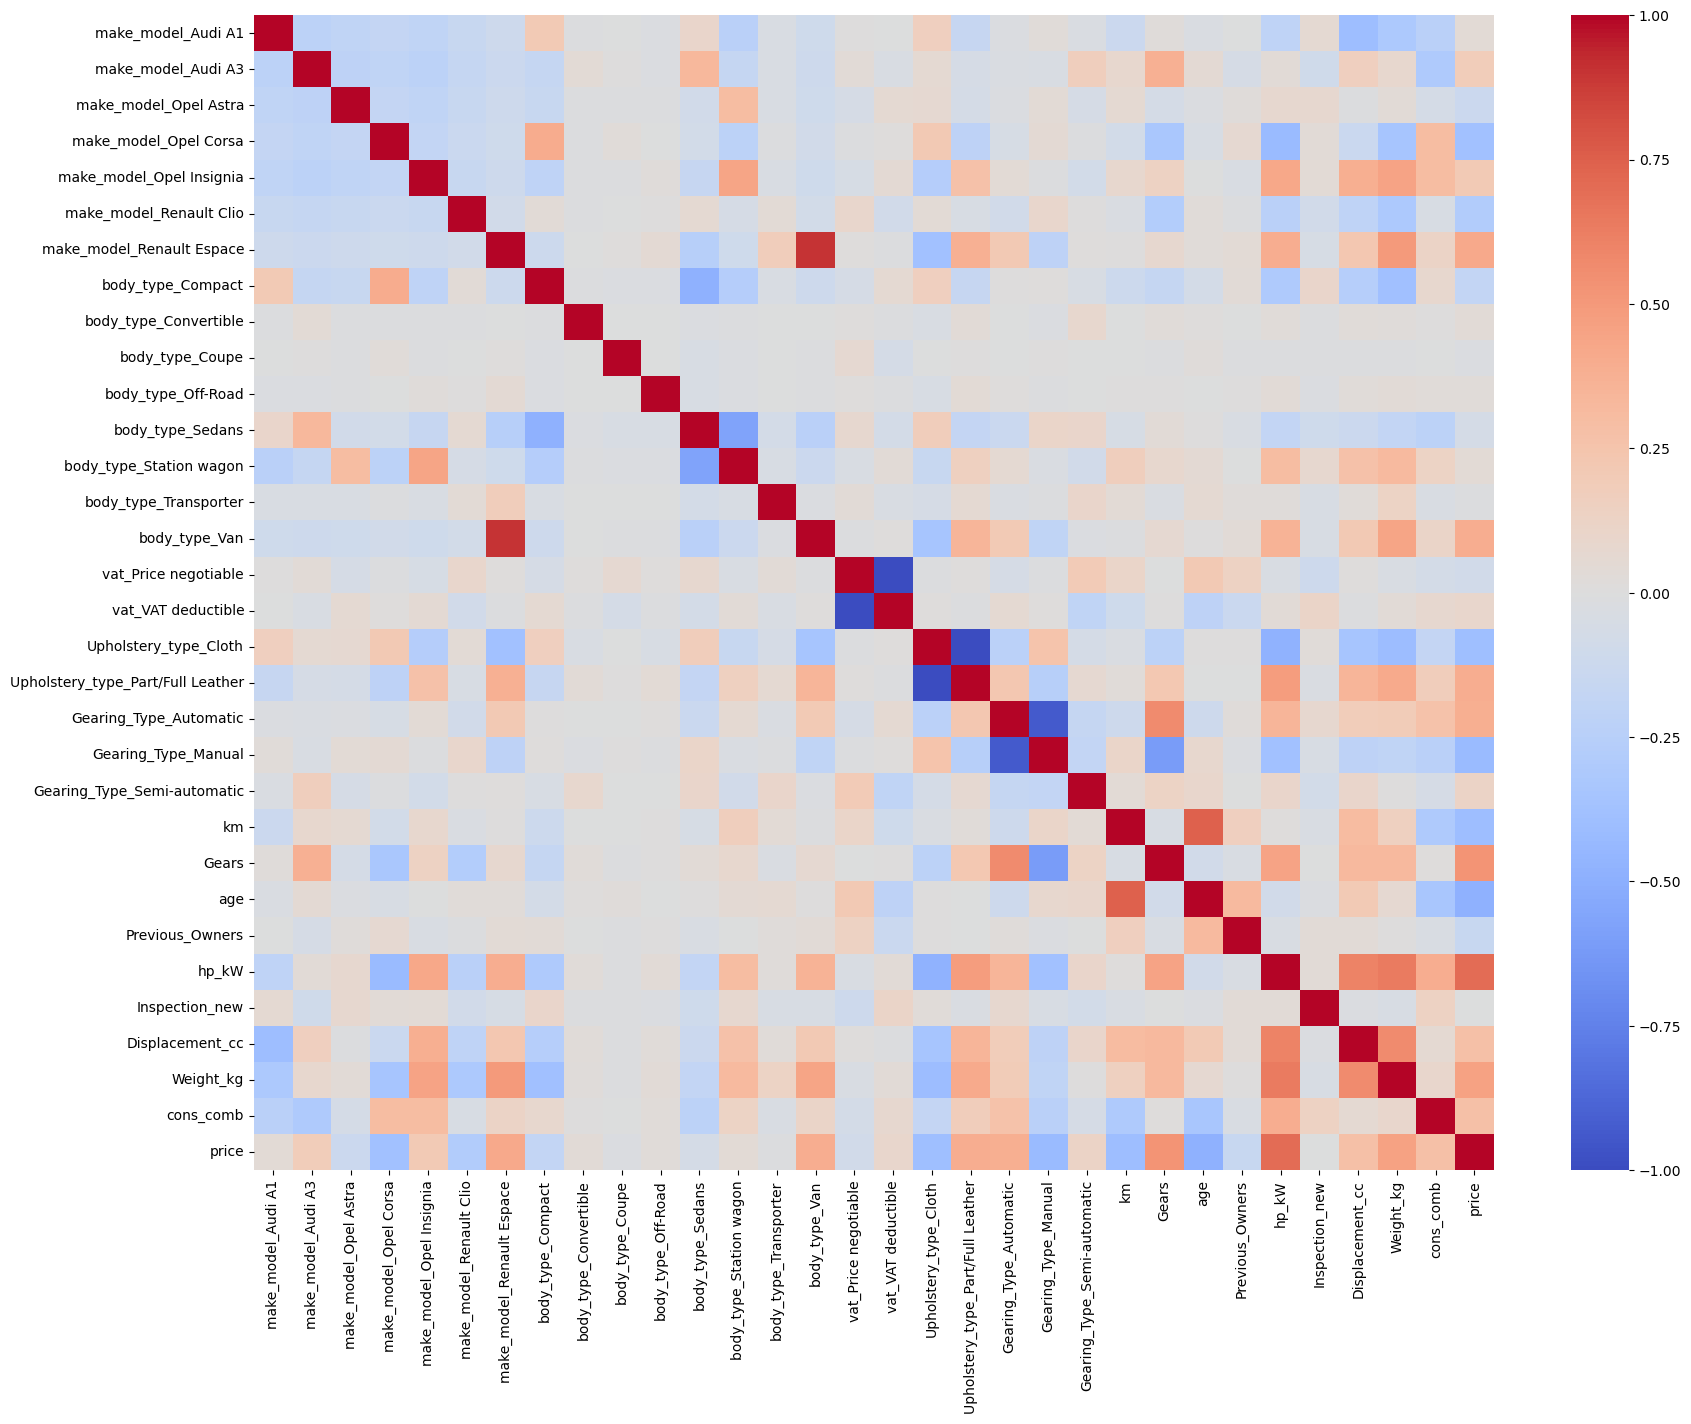

In [44]:
plt.figure(figsize=(20, 15))
sns.heatmap(X_train_trans.join(y_train).corr(), vmin=-1, vmax=1, cmap="coolwarm");

### Scaling

In [45]:
scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train_trans)

X_train_scaled = scaler.transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [46]:
X_train_scaled.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
14210,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.002,0.333,0.000,0.250,0.492,0.000,0.437,0.564,0.623
10027,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.215,0.333,1.000,0.250,0.236,1.000,0.341,0.397,0.148
318,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.180,0.667,1.000,0.500,0.118,1.000,0.052,0.208,0.230
4098,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.066,0.333,0.333,0.250,0.177,0.000,0.341,0.303,0.164
3344,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.084,0.667,0.667,0.250,0.276,0.000,0.243,0.282,0.262


In [47]:
X_test_scaled.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
7261,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.005,0.333,0.000,0.250,0.106,0.000,0.053,0.359,0.246
8215,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.099,0.000,0.667,0.250,0.059,0.000,0.172,0.197,0.131
13945,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.093,0.333,0.667,0.250,0.307,0.000,0.341,0.548,0.279
6684,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.053,0.333,0.333,0.250,0.205,0.000,0.245,0.269,0.393
13394,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.129,0.333,0.667,0.250,0.307,0.000,0.341,0.548,0.262


In [ ]:
# df2 = pd.concat(X_test_scaled, X_train_scaled], axis=0, ignore_index=True)

# # Display the concatenated DataFrame
# df2.head()

## Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [48]:
def train_val(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {
        "train": {
            "R2": r2_score(y_train, y_train_pred),
            "mae": mean_absolute_error(y_train, y_train_pred),
            "mse": mean_squared_error(y_train, y_train_pred),
            "rmse": mean_squared_error(y_train, y_train_pred, squared=False),
        },
        "test": {
            "R2": r2_score(y_test, y_pred),
            "mae": mean_absolute_error(y_test, y_pred),
            "mse": mean_squared_error(y_test, y_pred),
            "rmse": mean_squared_error(y_test, y_pred, squared=False),
        },
    }

    return pd.DataFrame(scores)

In [49]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [50]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.853,0.850
mae,1979.556,1946.496
mse,8132512.183,8211739.646
rmse,2851.756,2865.613


### Adjusted R2 Score

In [51]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]  # number of observations
    p = X.shape[1]  # number of independent variables
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2


# If there are too many features in our data, but not enough rows, which makes a false improvement in our model's R2_score.
# Especially in such data or if too many new features (such as dummies feature) have been added to our data.
# We need to detect the real R2_score with adjusted R2_score.

# Adjusted R2_score Checks the trade off between the number of rows and the feature,
# and returns us a score. If there is a large imbalance between the numbers,
# there will be serious decreases in the adjusted_R2_score.

# We define the above function for Adjusted R2 Score.

In [52]:
y_pred = lm.predict(X_test_scaled)

In [53]:
adj_r2(y_test, y_pred, X_test_scaled)

0.8481842019856171

### Cross Validate

In [54]:
model = LinearRegression()

scores = cross_validate(
    model,
    X_train_scaled,
    y_train,
    scoring=[
        "r2",
        "neg_mean_absolute_error",
        "neg_mean_squared_error",
        "neg_root_mean_squared_error",
    ],
    cv=10,
    return_train_score=True,
)

# As we learned in our previous lessons, we perform the overfiting control by comparing the train and
# validation scores we receive through cross validaition.

In [55]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.023,0.007,0.855,0.852,-2011.469,-1984.042,-8240895.374,-8124190.271,-2870.696,-2850.297
1,0.027,0.008,0.849,0.853,-2000.000,-1985.730,-8361734.754,-8116795.541,-2891.666,-2848.999
2,0.032,0.009,0.874,0.850,-1904.604,-1994.284,-6941293.154,-8266630.125,-2634.633,-2875.175
3,0.022,0.005,0.858,0.852,-1900.278,-1994.673,-6839739.206,-8278688.902,-2615.290,-2877.271
4,0.019,0.009,0.848,0.853,-1993.579,-1988.683,-8024782.765,-8145169.186,-2832.805,-2853.974
5,0.025,0.008,0.850,0.853,-1976.627,-1981.921,-7737449.156,-8182078.877,-2781.627,-2860.433
6,0.017,0.008,0.844,0.854,-2028.418,-1970.271,-9460084.089,-7991524.560,-3075.725,-2826.928
7,0.017,0.005,0.856,0.852,-1968.777,-1982.403,-8168326.890,-8131030.306,-2858.028,-2851.496
8,0.024,0.007,0.832,0.855,-2103.770,-1966.533,-9554858.763,-7976994.405,-3091.093,-2824.357
9,0.016,0.004,0.846,0.853,-2004.908,-1973.528,-8738408.619,-8069543.034,-2956.080,-2840.694


In [56]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# We see that the scores between the train and validaiton set and the train set are close to each other.
# There is no overfitting.

test_r2                                    0.851
train_r2                                   0.853
test_neg_mean_absolute_error           -1989.243
train_neg_mean_absolute_error          -1982.207
test_neg_mean_squared_error         -8206757.277
train_neg_mean_squared_error        -8128264.521
test_neg_root_mean_squared_error       -2860.764
train_neg_root_mean_squared_error      -2850.963
dtype: float64

In [57]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.853,0.850
mae,1979.556,1946.496
mse,8132512.183,8211739.646
rmse,2851.756,2865.613


In [58]:
4956 / df.price.mean()

# According to the rmse score we get from the test set (hold out set) score we will give to the customer,
# our model makes an average of 24.7% error.

0.2736999005641309

## Pipeline

In [80]:
X = df.drop(columns=["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# After dropping outlier observations, we divide the remaining data into X and y and divide it into train and test sets.

In [81]:
X_train.head()

,make_model,body_type,vat,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,cons_comb
7394,Opel Astra,Station wagon,VAT deductible,1.000,6.000,0.000,1.000,110.000,0,Cloth,Manual,1399.000,1322.000,5.500
4718,Audi A3,Sedans,VAT deductible,100.000,7.000,0.000,1.000,85.000,0,Cloth,Automatic,999.000,1280.000,5.200
12494,Renault Clio,Station wagon,Price negotiable,69800.000,6.000,3.000,1.000,66.000,0,Cloth,Semi-automatic,1461.000,1255.000,3.700
13082,Renault Clio,Compact,VAT deductible,16.000,5.000,0.000,1.000,56.000,0,Cloth,Manual,898.000,1126.000,5.000
1793,Audi A1,Compact,VAT deductible,1647.363,7.000,0.000,1.000,85.000,0,Cloth,Automatic,999.000,1200.000,4.800


In [82]:
cat_onehot = [
    'make_model',
    'body_type', 
    'vat', 
    'Upholstery_type',
    'Gearing_Type',
]


In [83]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)


column_trans = make_column_transformer(
    (enc_onehot, cat_onehot),
    
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

In [89]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [
    ("OneHot_Ordinal_Encoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("Ridge", Ridge()),
]

LRmodel_pipe = Pipeline(steps=operations).set_output(transform="pandas")
# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

LRmodel_pipe.fit(X_train, y_train)

# What does pipe_model.fit(X,y) do here, respectively?
# The first operation in the pipe_model is column_trans;
# 1. Onehotencoder conversion is done to featurs (cat_onehot) in X data that will apply onehotencoder conversion.
# 2. Ordinalencoder conversion is done to featurs (cat_ordinal) in X data to
# which ordinalencoder conversion will be applied.
# 3. Except for the converted featurs, no action is taken on the remaining featurs, they are left as is.
# Since the second action in the pipe_model is MinMaxScaler();
# 4. After the transformation, minmax scale is applied to the new numeric X we get.
# Dummies featurs consisting of 0s and 1s in our data
# Since, minmaxscale was applied so that these observations remain 0 and 1 again.
# The third action in pipe_model is Lasso();
# 5. Transformed and scaled X together with y Lasso are given to the model and the training is completed.

C:\Users\nurel\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Upholstery_type',
                                                   'Gearing_Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [85]:
import joblib

In [86]:
from sklearn.pipeline import Pipeline

In [94]:
# Specify the complete file path including the filename and extension
file_path = "C:/Users/nurel/OneDrive/Desktop/streamlit2/model.pkl"

# Save the pipeline model using joblib.dump
joblib.dump(LRmodel_pipe, file_path)

['C:/Users/nurel/OneDrive/Desktop/streamlit2/model.pkl']

In [96]:
import os

# Choose a suitable directory
directory = "D:\\DS-05\\Model Deployment"  # Update this with your actual username

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Construct the file path
file_path = os.path.join(directory, "df_model.csv")

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___